# Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [tv_data, radio_data, newspaper_data]
    Y = sales_data
    return X, Y


1A

In [2]:
file_name_dataset = 'advertising.csv'
X, y = prepare_data(file_name_dataset)
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5]) ]

print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


---
# Excersice 2



In [3]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b  = 0
    
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

In [4]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1*x1 + w2*x2 + w3*x3 +b
    return result

In [5]:
def compute_loss_mse(y, y_hat):
    loss_mse = (y - y_hat)**2
    return loss_mse

In [6]:
def compute_gradient_wi(x, y, y_hat):
    gradient_wi = 2*x*(y_hat - y)
    return gradient_wi

In [7]:
def compute_gradient_b(b, y, y_hat):
    gradient_b = 2*(y_hat - y)
    return gradient_b

In [8]:
def update_weight_wi(wi, dl_dw, lr):
    return wi - lr*dl_dw

In [9]:
def update_weight_b(b, dl_db, lr):
    return b - lr*dl_db

In [10]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            #get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            #compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            #compute_loss
            loss = compute_loss_mse(y, y_hat)

            #compute_gradient w1, w2, w3
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(b, y, y_hat)

            #update parameter
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            #logging
            losses.append(loss)

    return (w1, w2, w3, b, losses)


2A

In [11]:
y = predict (x1 =1, x2 =1, x3 =1, w1 =0, w2 =0.5, w3 =0, b =0.5)
print (y)

1.0


3A

In [12]:
l = compute_loss_mse(y_hat =1, y =0.5)
print (l)

0.25


4A

In [13]:
g_wi = compute_gradient_wi(x =1.0, y =1.0, y_hat =0.5)
print(g_wi)

-1.0


5B

In [14]:
g_b = compute_gradient_b(b = 0, y =2.0, y_hat =0.5)
print(g_b)

-3.0


6A

In [15]:
after_wi = update_weight_wi (wi = 1.0, dl_dw = -0.5, lr = 1e-5)
print(after_wi)

1.000005


7A

In [16]:
after_b = update_weight_b(b = 0.5, dl_db = -1.0, lr = 1e-5)
print(after_b)

0.50001


<function matplotlib.pyplot.show(close=None, block=None)>

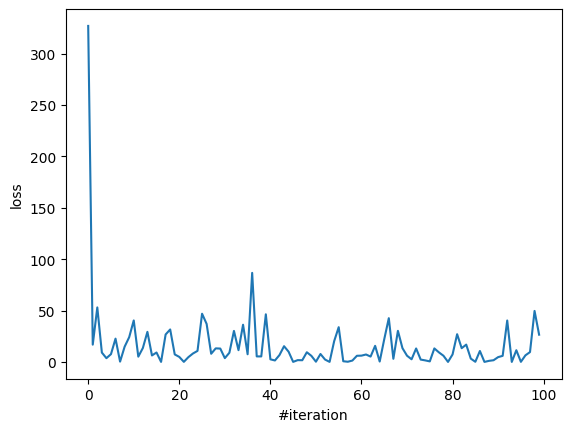

In [17]:
X, y = prepare_data("advertising.csv")
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("loss")
plt.show

8A

In [18]:
X, y = prepare_data("advertising.csv")
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


9B

In [19]:
tv = 19.2
radio = 35.9
newspaper = 51.3
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b,losses) = implement_linear_regression(X, y, epoch_max =50, lr =1e-5)
sales = predict (tv, radio, newspaper, w1, w2, w3, b)
print (f'predicted sales is { sales }')

predicted sales is 8.176413319549823


10A

In [20]:
def compute_loss_mae(y, y_hat):
    loss_mae = abs(y - y_hat)
    return loss_mae

l = compute_loss_mae(y = 0.5, y_hat = 1)
print(l)

0.5


---
# Exercise 3

In [23]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max =50, lr =1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            #get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            #compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            #compute_loss
            loss = compute_loss_mse(y, y_hat)
            loss_total += loss

            #compute_gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(b, y, y_hat)

            #accumulate
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db


        #update parameter
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        #logging
        losses.append(loss_total/N) 
    return (w1, w2, w3, b, losses)

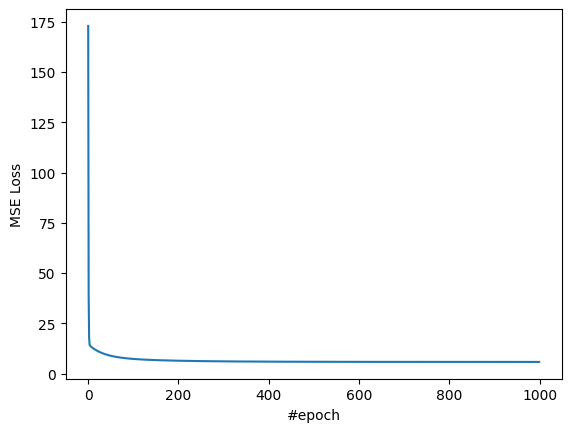

In [24]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000, lr =1e-5)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

In [27]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
print(w1,w2,w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


---
# Question 4

In [29]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input  and y output for training
    #Create list of features for input
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X,y

In [30]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    
    return [0, 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344]
    # return [bias, w1, w2, w3] 

In [31]:
#Predict ouput by using y = x0*b + x1*w1 + x2*w2 + x3*w3

def predict(X_features, weights):
  result = sum([x*w for x, w in zip(X_features, weights)])
  return result

def compute_loss(y_hat, y):
  return (y_hat - y)**2

# compute gradient
def compute_gradient_w(X_features, y, y_hat):
  dl_dweights = [2*x*(y_hat - y) for x in X_features]
  return dl_dweights 

# update weights
def update_weight(weights, dl_dweights, lr):
  weights = [w - lr*dl_dw for w, dl_dw in zip(weights, dl_dweights)]
  return weights    

In [34]:
def implement_linear_regression(X_feature, y_ouput, epoch_max = 50,lr = 1e-5):

    losses = []
    weights = initialize_params()
    N = len(y_ouput)
    for epoch in range(epoch_max):
        print("epoch", epoch)
        for i in range(N):
            # get a sample - row i     
            features_i = X_feature[i]
            y = y_ouput[i]

            # compute output 
            y_hat = predict(features_i, weights)

            # compute loss
            loss = compute_loss(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # logging
            losses.append(loss) 
    return weights, losses

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


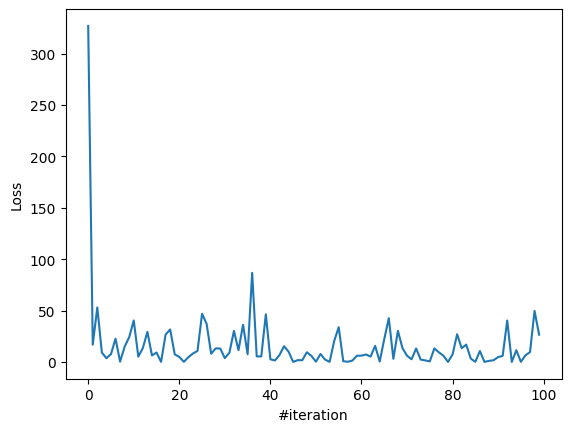

In [35]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

12A

In [36]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
# Print loss value at interation 9999
print(L[9999])

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.338878034644296
